In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
# Импорт библиотеки seaborn для построения парных графиков
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers

print(tf.__version__)

2023-06-18 01:03:38.592450: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 01:03:39.181646: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 01:03:39.183088: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 01:03:44.702885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [2]:
raw_dataset = pd.read_csv('Salary_Data.csv')
raw_dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
raw_dataset.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
dataset = raw_dataset.dropna()
dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
dataset.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [6]:
dataset.isna().sum()
data_encoded = pd.get_dummies(dataset, columns=['Gender', 'Education Level', 'Job Title'])

dataset.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [7]:
print(data_encoded.head())

    Age  Years of Experience    Salary  Gender_Female  Gender_Male   
0  32.0                  5.0   90000.0          False         True  \
1  28.0                  3.0   65000.0           True        False   
2  45.0                 15.0  150000.0          False         True   
3  36.0                  7.0   60000.0           True        False   
4  52.0                 20.0  200000.0          False         True   

   Gender_Other  Education Level_Bachelor's   
0         False                        True  \
1         False                       False   
2         False                       False   
3         False                        True   
4         False                       False   

   Education Level_Bachelor's Degree  Education Level_High School   
0                              False                        False  \
1                              False                        False   
2                              False                        False   
3                   

In [8]:
train_dataset = data_encoded.sample(frac=0.8,random_state=0)
test_dataset = data_encoded.drop(train_dataset.index)

In [9]:
test_dataset

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,31.0,4.0,80000.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,47.0,19.0,190000.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
24,41.0,13.0,140000.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
25,28.0,3.0,45000.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,49.0,20.0,200000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6686,32.0,3.0,40000.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6692,24.0,1.0,35000.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6693,43.0,14.0,140000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


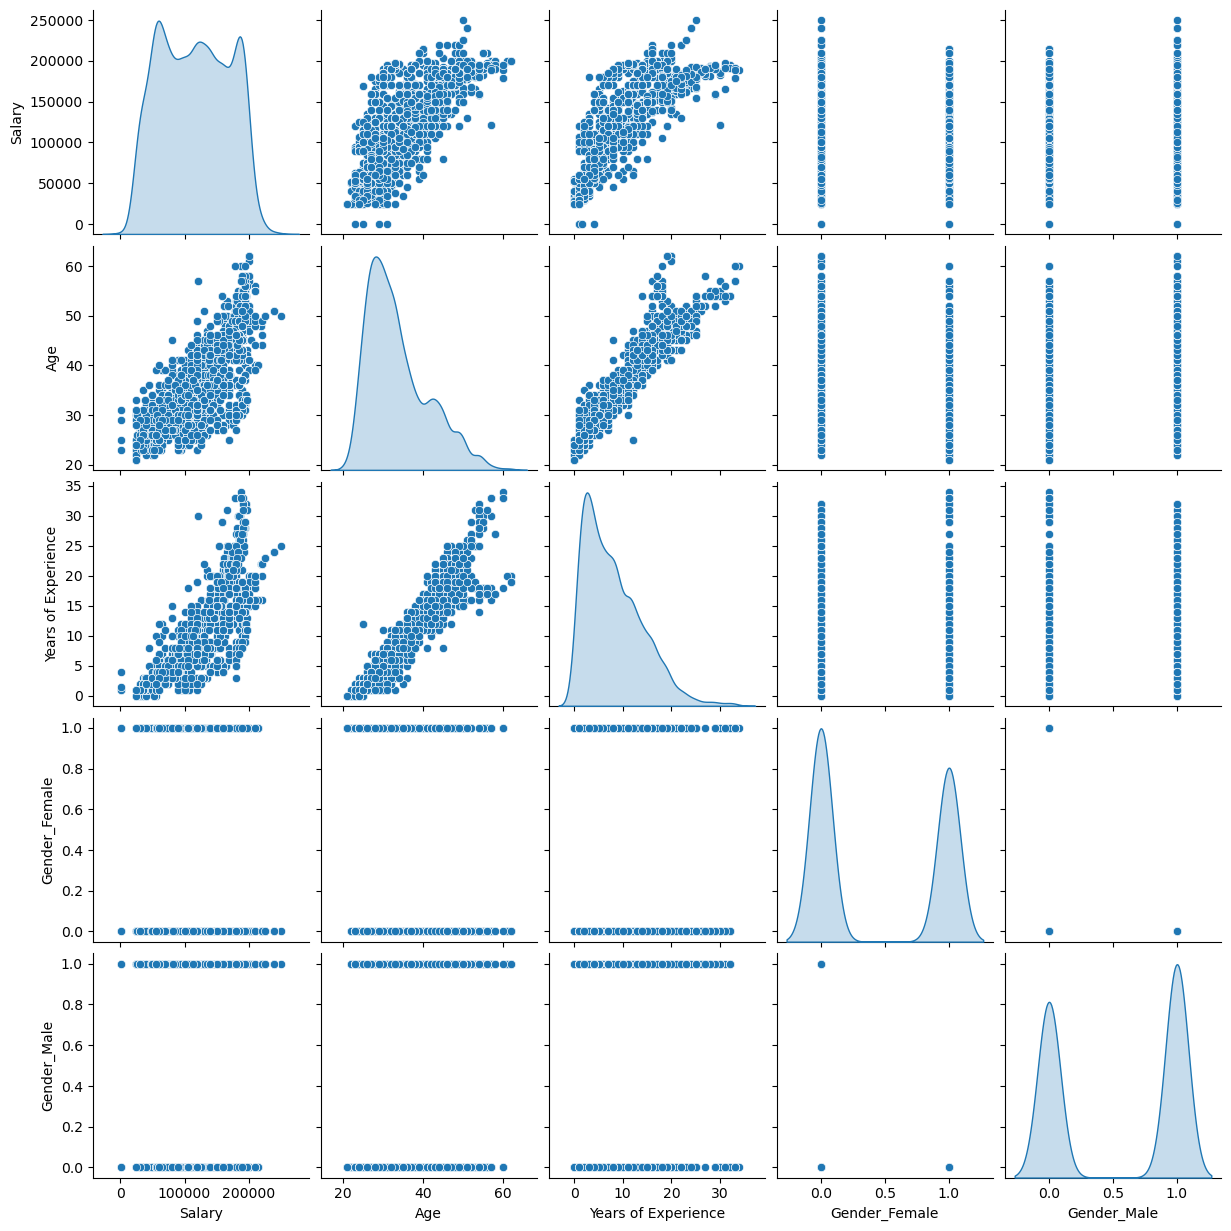

In [10]:
sns.pairplot(train_dataset[["Salary", "Age", "Years of Experience", "Gender_Female", "Gender_Male"]], diag_kind="kde")

In [11]:
train_stats = train_dataset.describe()
train_stats.pop('Salary')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Age,5358.0,33.629713,7.595885,21.0,28.0,32.0,38.0,62.0
Years of Experience,5358.0,8.087066,5.997839,0.0,3.0,7.0,12.0,34.0


In [12]:
train_labels = train_dataset.pop('Salary')
test_labels = test_dataset.pop('Salary')

In [13]:
from keras import models
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(1)
    ])

#  optimizer = tf.train.RMSPropOptimizer(0.001)
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
# mse - mean_squared_error (средняя квадратическая ошибка)
# mae - mean_absolute_error (средняя абсолютная ошибка)
    model.compile(loss='huber_loss', optimizer=opt, metrics=['mae', 'mse'])
    return model

model = build_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                13056     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38,017
Trainable params: 38,017
Non-trainable params: 0
_________________________________________________________________


In [15]:
train_dataset = tf.constant(train_dataset.astype('float32'))
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 409ms/step


array([[-0.41366684],
       [-0.31026   ],
       [-0.42501947],
       [-0.34642082],
       [-0.47644964],
       [-0.13654983],
       [-0.4396892 ],
       [-0.391808  ],
       [-0.49550903],
       [-0.2817089 ]], dtype=float32)

In [16]:
class PrintDot(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
    # Перевод строки после 100 эпох
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000
# validation_split = 0.2 - 20% данных отводится на проверку
history = model.fit(
 train_dataset, train_labels,
 epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,5111.494141,5111.994141,89236832.0,6126.914062,6127.414062,113544216.0,995
996,5112.331543,5112.832031,89841936.0,5820.728027,5821.228027,114054856.0,996
997,5108.433594,5108.933105,89871200.0,5668.107910,5668.607910,115848352.0,997
998,5052.416016,5052.916016,87840400.0,5773.691406,5774.191406,118790368.0,998
999,5111.345703,5111.845703,90194704.0,5986.602051,5987.102051,116813688.0,999


In [18]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
test_labels = tf.constant(test_labels.astype('float32'))
test_dataset = tf.constant(test_dataset.astype('float32'))
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("Среднее абсолютное отклонение на проверочных данных: {:5.2f} долларов".format(mae))
print("Среднее квадратическая ошибка на проверочных данных: {:5.2f} долларов".format(mse) + "\n")
print(test_labels)

Среднее абсолютное отклонение на проверочных данных: 5980.20 долларов
Среднее квадратическая ошибка на проверочных данных: 114676664.00 долларов

tf.Tensor([ 90000.  80000. 190000. ...  35000. 140000.  55000.], shape=(1340,), dtype=float32)


42/42 [==============================] - 0s 2ms/step


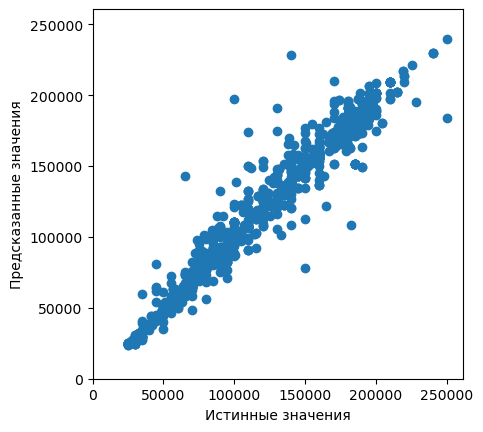

In [19]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

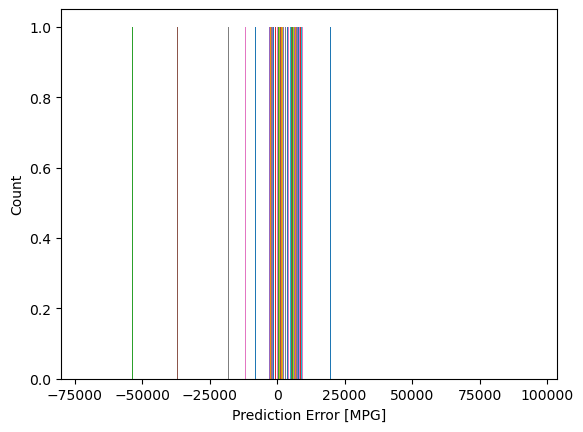

In [20]:
error = test_predictions - test_labels
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [21]:
model.save('model_huber_loss.h5')
model_2Dense128Neurons = keras.models.load_model('model_2Dense128Neurons.h5')
model_Baza = keras.models.load_model('model_Baza.h5')
model_256Neurons = keras.models.load_model('model_256Neurons.h5')
model_huber_loss = keras.models.load_model('model_huber_loss.h5')

loss, train_mae, train_mse = model_Baza.evaluate(train_dataset, train_labels, verbose=0)
loss, train_mae1, train_mse1 = model_2Dense128Neurons.evaluate(train_dataset, train_labels, verbose=0)
loss, train_mae2, train_mse2 = model_256Neurons.evaluate(train_dataset, train_labels, verbose=0)
loss, train_mae3, train_mse3 = model_huber_loss.evaluate(train_dataset, train_labels, verbose=0)

loss, mae, mse = model_Baza.evaluate(test_dataset, test_labels, verbose=0)
loss, mae1, mse1 = model_2Dense128Neurons.evaluate(test_dataset, test_labels, verbose=0)
loss, mae2, mse2 = model_256Neurons.evaluate(test_dataset, test_labels, verbose=0)
loss, mae3, mse3 = model_huber_loss.evaluate(test_dataset, test_labels, verbose=0)


print("Среднее абсолютное отклонение на проверочных данных: {:5.2f} долларов в год".format(mae))
print("Средняя квадратическая ошибка на проверочных данных: {:5.2f}".format(mse))

Среднее абсолютное отклонение на проверочных данных: 10979.71 долларов в год
Средняя квадратическая ошибка на проверочных данных: 237264240.00
